In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
directory_data = r"C:\Users\LENOVO\Capstone Project\Train"

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   rotation_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   validation_split = 0.2)

In [4]:
#Mendefinisikan data train
train_dataset  = train_datagen.flow_from_directory(directory =directory_data,
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   batch_size = 16,
                                                   subset = 'training')

Found 2703 images belonging to 10 classes.


In [5]:
valid_dataset = valid_datagen.flow_from_directory(directory = directory_data,
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  shuffle = False,
                                                  batch_size = 16,
                                                  subset = 'validation')

Found 672 images belonging to 10 classes.


In [6]:
train_dataset.class_indices

{'Acnitic Keratosis': 0,
 'Herpes': 1,
 'Jerawat': 2,
 'Kerutan': 3,
 'Kulit Normal': 4,
 'Mata_Panda': 5,
 'Milia': 6,
 'Panu': 7,
 'Rosacea': 8,
 'Vitiligo': 9}

In [7]:
#Mengambil model pretrained VGG16 dari tensorflow keras
from tensorflow.keras.applications import MobileNetV2


pretrained_model = tf.keras.applications.MobileNetV2(input_shape=[224, 224, 3], include_top=False, weights="imagenet")
#Mencegah model dari mengubah bobot pada proses pelatihan
pretrained_model.trainable = False

In [8]:
#Menambahkan layer tambahan untuk proses input dan output
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, BatchNormalization, Dropout, Activation
model = tf.keras.Sequential()
model.add(pretrained_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(16,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 dropout (Dropout)           (None, 7, 7, 1280)        0         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 batch_normalization (BatchN  (None, 62720)            250880    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 32)                2007072   
                                                                 
 batch_normalization_1 (Batc  (None, 32)               1

In [10]:
#Menambahkan optimiser untuk mengurangi loss
OPT = tf.keras.optimizers.Adam(0.001)

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=OPT)

In [11]:
model_history10=model.fit(train_dataset,
                        validation_data=valid_dataset,
                        epochs = 20,
                        verbose = 1)

Epoch 1/20
169/169 [==============================] - 88s 500ms/step - loss: 1.5634 - accuracy: 0.5490 - val_loss: 1.0376 - val_accuracy: 0.7173
Epoch 2/20
169/169 [==============================] - 67s 396ms/step - loss: 1.0923 - accuracy: 0.7155 - val_loss: 0.8277 - val_accuracy: 0.7887
Epoch 3/20
169/169 [==============================] - 72s 428ms/step - loss: 0.8398 - accuracy: 0.7710 - val_loss: 0.7399 - val_accuracy: 0.7917
Epoch 4/20
169/169 [==============================] - 72s 426ms/step - loss: 0.6768 - accuracy: 0.8172 - val_loss: 0.7211 - val_accuracy: 0.7857
Epoch 5/20
169/169 [==============================] - 73s 432ms/step - loss: 0.5879 - accuracy: 0.8372 - val_loss: 0.6818 - val_accuracy: 0.8140
Epoch 6/20
169/169 [==============================] - 69s 404ms/step - loss: 0.5366 - accuracy: 0.8483 - val_loss: 0.6008 - val_accuracy: 0.8155
Epoch 7/20
169/169 [==============================] - 69s 408ms/step - loss: 0.4652 - accuracy: 0.8594 - val_loss: 0.6410 - val_ac

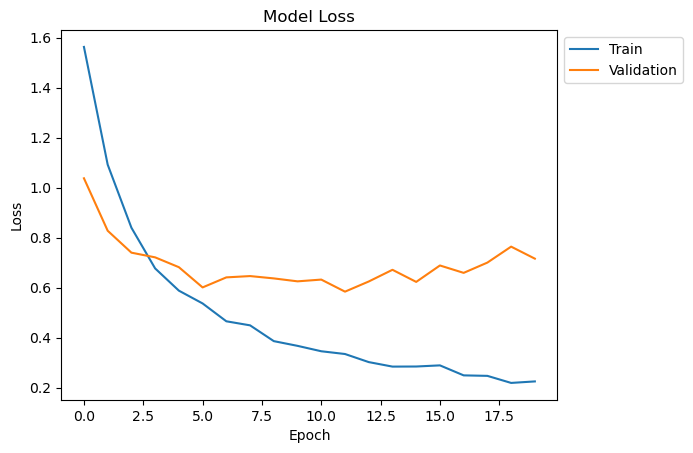

In [16]:
#Plot model loss
import matplotlib.pyplot as plt
plt.plot(model_history10.history['loss'])
plt.plot(model_history10.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

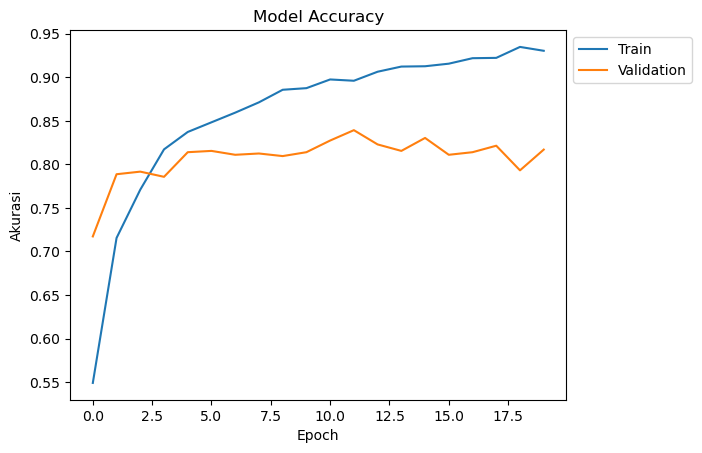

In [17]:
#Plot model akurasi
plt.plot(model_history10.history['accuracy'])
plt.plot(model_history10.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [18]:
#Melihat akurasi,presisi, dan recall model menggunakan data validasi

from sklearn.metrics import classification_report

predictions = model.predict(valid_dataset)
true_labels = valid_dataset.classes
class_indices = valid_dataset.class_indices
class_labels = {v: k for k, v in class_indices.items()}

predicted_labels = np.argmax(predictions, axis=1)
report = classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()))
print("Classification Report:\n", report)

42/42 [==============================] - 12s 251ms/step
Classification Report:
                    precision    recall  f1-score   support

Acnitic Keratosis       0.69      0.59      0.64        71
           Herpes       0.85      0.67      0.75        70
          Jerawat       0.80      0.66      0.72        65
          Kerutan       0.90      1.00      0.95        72
     Kulit Normal       0.93      0.94      0.94        71
       Mata_Panda       0.77      0.95      0.85        66
            Milia       0.87      0.77      0.82        70
             Panu       0.86      0.86      0.86        51
          Rosacea       0.65      0.97      0.78        68
         Vitiligo       0.96      0.75      0.84        68

         accuracy                           0.82       672
        macro avg       0.83      0.82      0.81       672
     weighted avg       0.83      0.82      0.81       672



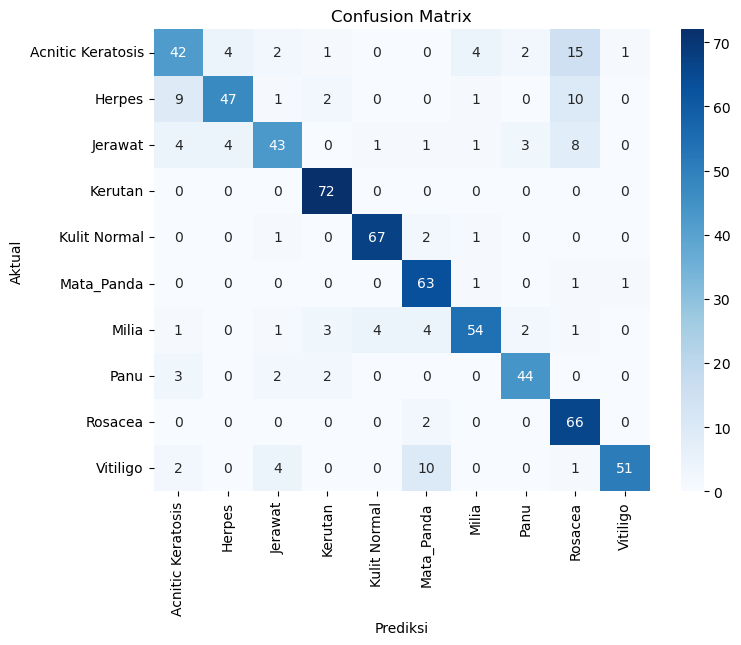

In [19]:
import matplotlib.pyplot as plt
#Matriks konfusi model dari data validasi
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [ ]:
model.save(r'C:\Users\LENOVO\Documents\training-model\mobilenetv2.h5')

In [ ]:
import tensorflow as tf

# Load the .h5 model
h5_model_path = r"C:\Users\LENOVO\Documents\training-model\mobilenetv2.keras"
model = tf.keras.models.load_model(h5_model_path)

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to a .tflite file
tflite_model_path = r"C:\Users\LENOVO\Documents\training-model\modelkeras.tflite"
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f'Model converted and saved to {tflite_model_path}')


In [ ]:
import tensorflow as tf

# Load the .keras model
keras_model_path = r"C:\Users\LENOVO\Documents\training-model\mobilenetv2.keras"
model = tf.keras.models.load_model(keras_model_path)

# Convert the model to TensorFlow Lite format with dynamic range quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the converted model to a .tflite file
tflite_model_path = r"C:\Users\LENOVO\Documents\training-model\modelquantized.tflite"
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f'Model converted and saved to {tflite_model_path}')

In [ ]:
#Melakukan uji coba dengan input gambar
from pylab import *
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import cv2

model = load_model(r"C:\Users\LENOVO\Documents\training-model\mobilenetv2.keras")
# Fungsi untuk melakukan prediksi gambar
def predict_image(model, image_path, class_labels):
    img = load_img(image_path, target_size=(224, 224))  # Ganti ukuran target sesuai dengan model Anda
    img = img_to_array(img)
    img = img / 255  # Normalisasi
    imshow(img)
    plt.axis('off')
    img = np.expand_dims(img, axis=0)

    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]

    return predicted_class

# Daftar nama kelas
class_labels = ['Actinic_Keratosis', 'Herpes', 'Jerawat',
                'Kerutan', 'Kulit Normal', 'Mata Panda', 'Milia',
                'Panu', 'Rosacea', 'vitiligo']

# Input gambar dari pengguna
image_path = r"D:\Vitiligo\download (2).jpeg"

# Melakukan prediksi
predicted_class = predict_image(model, image_path, class_labels)
print("Gambar ini diprediksi sebagai:", predicted_class)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import cv2

# Load TFLite model and allocate tensors.
path = r"C:\Users\LENOVO\Documents\training-model\modelquantized.tflite"
interpreter = tf.lite.Interpreter(model_path=path)
interpreter.allocate_tensors()

def predict_image(interpreter, image, class_labels):
    # Preprocess input image
    input_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    input_image = input_image.resize((224, 224))  # Adjust size as per your model input size
    input_tensor = np.expand_dims(input_image, axis=0)
    input_tensor = input_tensor.astype('float32') / 255.0  # Normalize pixel values to [0, 1]

    # Set input tensor
    input_details = interpreter.get_input_details()
    interpreter.set_tensor(input_details[0]['index'], input_tensor)

    # Run inference
    interpreter.invoke()

    # Get the output tensor
    output_details = interpreter.get_output_details()
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Get predicted class
    predicted_class_index = np.argmax(output_data)
    predicted_class = class_labels[predicted_class_index]

    # Visualize input image
    plt.imshow(input_image)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class

# Fungsi untuk mendeteksi blur
def detect_blur(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = cv2.Laplacian(gray, cv2.CV_64F).var()
    threshold = 100  # Set threshold value as per requirement
    return fm < threshold

# Daftar nama kelas
class_labels = ['Actinic_Keratosis', 'Herpes', 'Jerawat',
                'Kerutan', 'Kulit Normal', 'Mata Panda', 'Milia',
                'Panu', 'Rosacea', 'vitiligo']

# Input gambar dari pengguna
image_path = r"D:\Vitiligo\download (2).jpeg"
image = cv2.imread(image_path)

# Deteksi blur
is_blurry = detect_blur(image)

if is_blurry:
    print("Gambar terlalu blur, silakan unggah gambar yang lebih jelas.")
else:
    # Lanjutkan ke tahap prediksi klasifikasi dengan model TFLite
    print("Gambar tidak blur, memproses untuk prediksi klasifikasi...")
    predicted_class = predict_image(interpreter, image, class_labels)
    print("Gambar ini diprediksi sebagai:", predicted_class)